<a href="https://colab.research.google.com/github/Ahmadar91/ML/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ahmad Abdilrahim
# Lab 3
# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms

# Task 1

# Task – 1: Activation Functions
#### Different activation functions are used in the NN. This part of the lab is to implement
### the different activation functions and their derivatives.
###• Write Python code to produce the following activation functions and their
#### derivatives if any.
####o Sigmoid activation function and its derivative.
####o Tanh activation function and its derivative.
####o ReLU activation function and its derivative.

#### Numpy Implementaion


In [ ]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.power(tanh(x), 2)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 400)

sigmoid_values = sigmoid(x)
sigmoid_derivative_values = sigmoid_derivative(x)

tanh_values = tanh(x)
tanh_derivative_values = tanh_derivative(x)

relu_values = relu(x)
relu_derivative_values = relu_derivative(x)




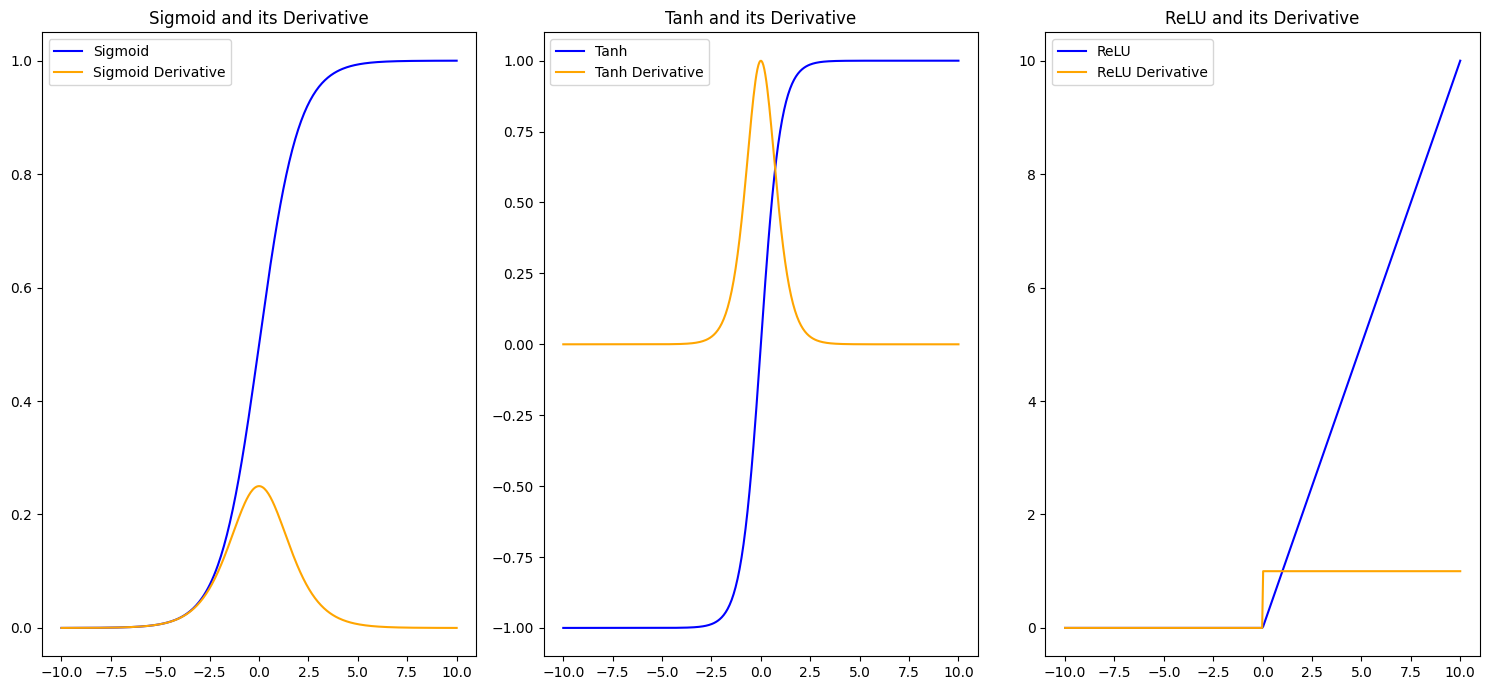

In [ ]:

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_values, label='Sigmoid', color='blue')
plt.plot(x, sigmoid_derivative_values, label='Sigmoid Derivative', color='orange')
plt.title('Sigmoid and its Derivative')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, tanh_values, label='Tanh', color='blue')
plt.plot(x, tanh_derivative_values, label='Tanh Derivative', color='orange')
plt.title('Tanh and its Derivative')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, relu_values, label='ReLU', color='blue')
plt.plot(x, relu_derivative_values, label='ReLU Derivative', color='orange')
plt.title('ReLU and its Derivative')
plt.legend()

plt.tight_layout()
plt.show()

####• Define an array X= [-21,…,21] and pass it to the sigmoid function to calculate
#### the corresponding values of the function (Y). Plot results of this operation as
#### in the following.

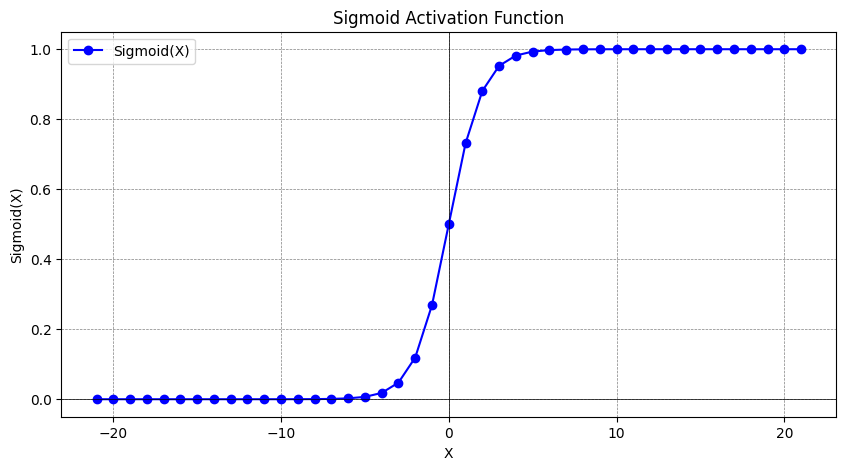

In [ ]:
X = np.arange(-21, 22)
Y = sigmoid(X)

plt.figure(figsize=(10, 5))
plt.plot(X, Y, 'bo-', label='Sigmoid(X)')
plt.title('Sigmoid Activation Function')
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


####• Repeat the former task for the SoftMax function. What is the difference
between the results between SoftMax and sigmoid and why does this
happen?

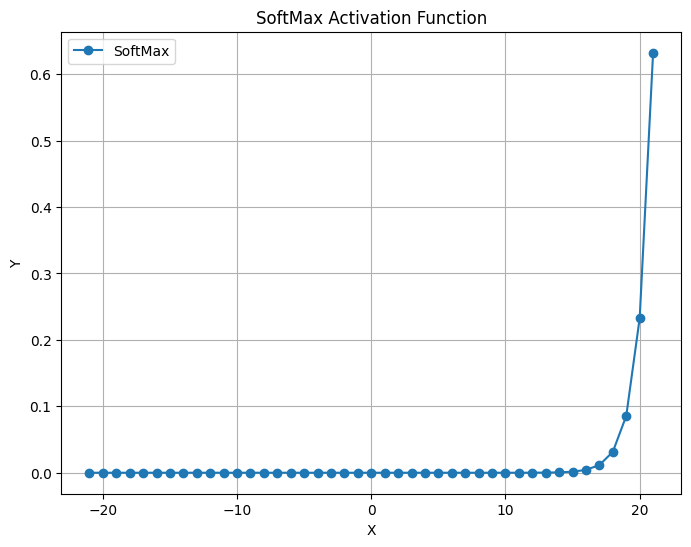

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

Y_softmax = softmax(X)

plt.figure(figsize=(8, 6))
plt.plot(X, Y_softmax, 'o-', label='SoftMax')
plt.title('SoftMax Activation Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()


Difference between SoftMax and Sigmoid:

1. Range of Outputs:
Sigmoid: Maps any input into a value between 0 and 1.  
SoftMax: Also produces values between 0 and 1, but the sum of all output values will be 1, making it suitable for multi-class probability distribution representations.
Nature of Outputs:

2. Sigmoid:
Treats each value independently, so it doesn't consider other values in the set.
SoftMax: Considers all values in the dataset and assigns a probability score to each such that they sum up to 1. Therefore, if one value increases, another has to decrease.

3. Use Cases:
Sigmoid: Commonly used for binary classification problems.
SoftMax: Used in the output layer of multi-class classification problems to represent the probability distribution across multiple classes.


The reason for the difference in their outputs is based on their mathematical definitions and intended use cases. The sigmoid function compresses individual values between 0 and 1, irrespective of other values. In contrast, the SoftMax function provides a normalized exponential function that will turn any set of numbers into a set of values between 0 and 1 that sum up to 1, making it a true probability distribution.


#### Torch Implmentation

In [ ]:

def torch_sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def torch_sigmoid_derivative(x):
    s = torch_sigmoid(x)
    return s * (1 - s)

def torch_tanh(x):
    return torch.tanh(x)

def torch_tanh_derivative(x):
    return 1 - torch.pow(torch_tanh(x), 2)

def torch_relu(x):
    return torch.clamp(x, min=0)

def torch_relu_derivative(x):
    return torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0))

x_torch = torch.linspace(-10, 10, 400)

sigmoid_values_torch = torch_sigmoid(x_torch)

sigmoid_derivative_values_torch = torch_sigmoid_derivative(x_torch)

tanh_values_torch = torch_tanh(x_torch)
tanh_derivative_values_torch = torch_tanh_derivative(x_torch)

relu_values_torch = torch_relu(x_torch)
relu_derivative_values_torch = torch_relu_derivative(x_torch)

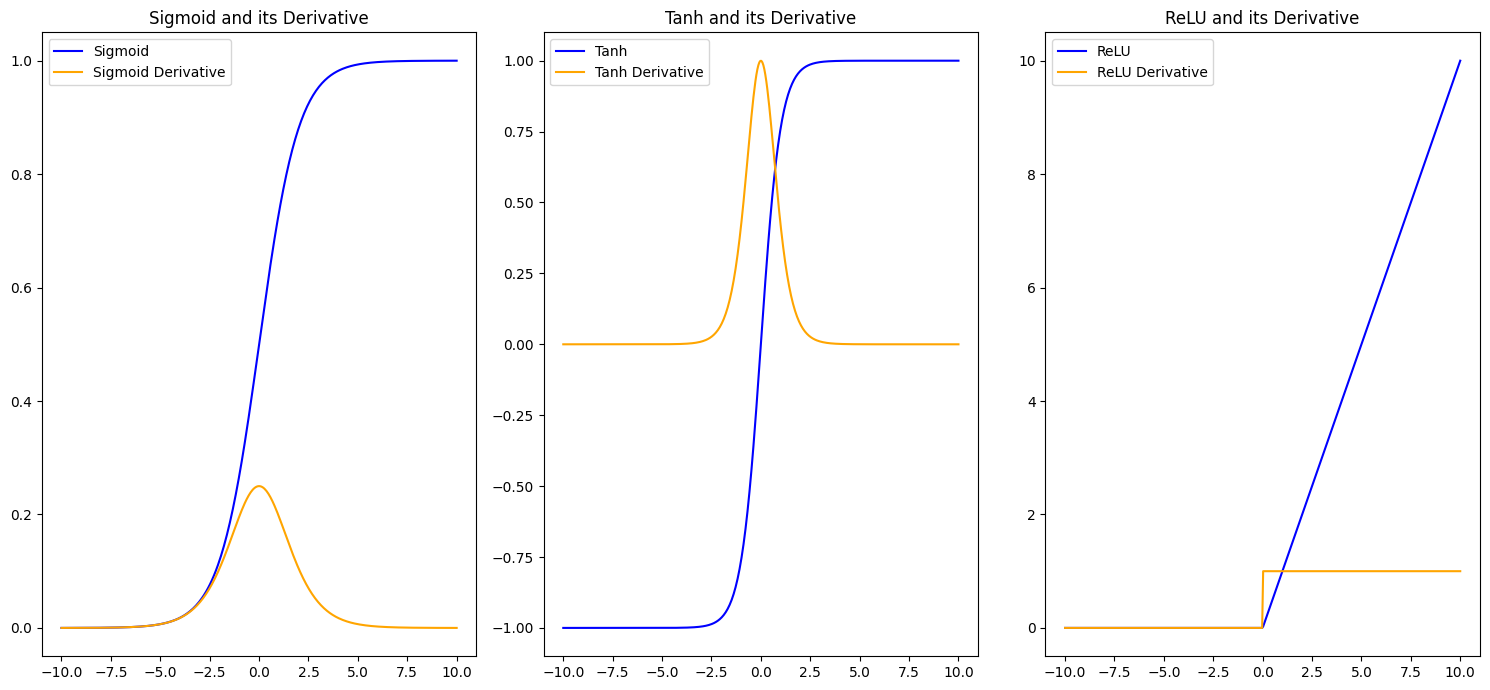

In [ ]:

plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_values_torch, label='Sigmoid', color='blue')
plt.plot(x, sigmoid_derivative_values_torch, label='Sigmoid Derivative', color='orange')
plt.title('Sigmoid and its Derivative')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, tanh_values_torch, label='Tanh', color='blue')
plt.plot(x, tanh_derivative_values_torch, label='Tanh Derivative', color='orange')
plt.title('Tanh and its Derivative')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, relu_values_torch, label='ReLU', color='blue')
plt.plot(x, relu_derivative_values_torch, label='ReLU Derivative', color='orange')
plt.title('ReLU and its Derivative')
plt.legend()

plt.tight_layout()
plt.show()

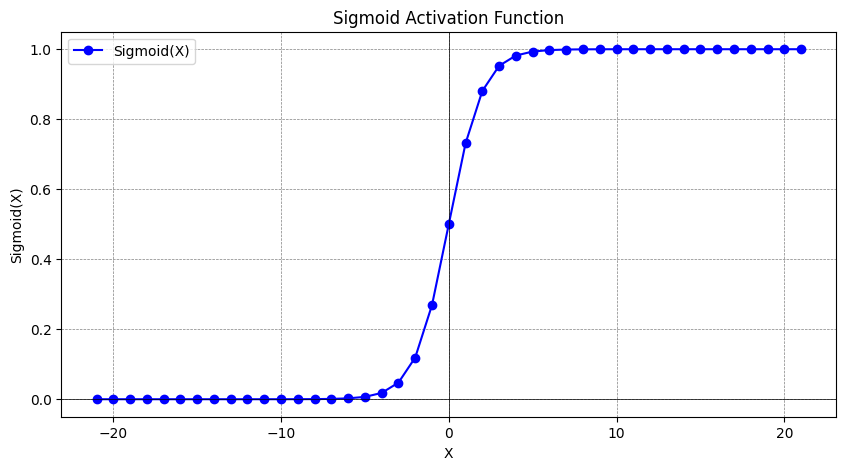

In [ ]:
X = torch.arange(-21, 22)
Y = torch_sigmoid(X)

plt.figure(figsize=(10, 5))
plt.plot(X, Y, 'bo-', label='Sigmoid(X)')
plt.title('Sigmoid Activation Function')
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

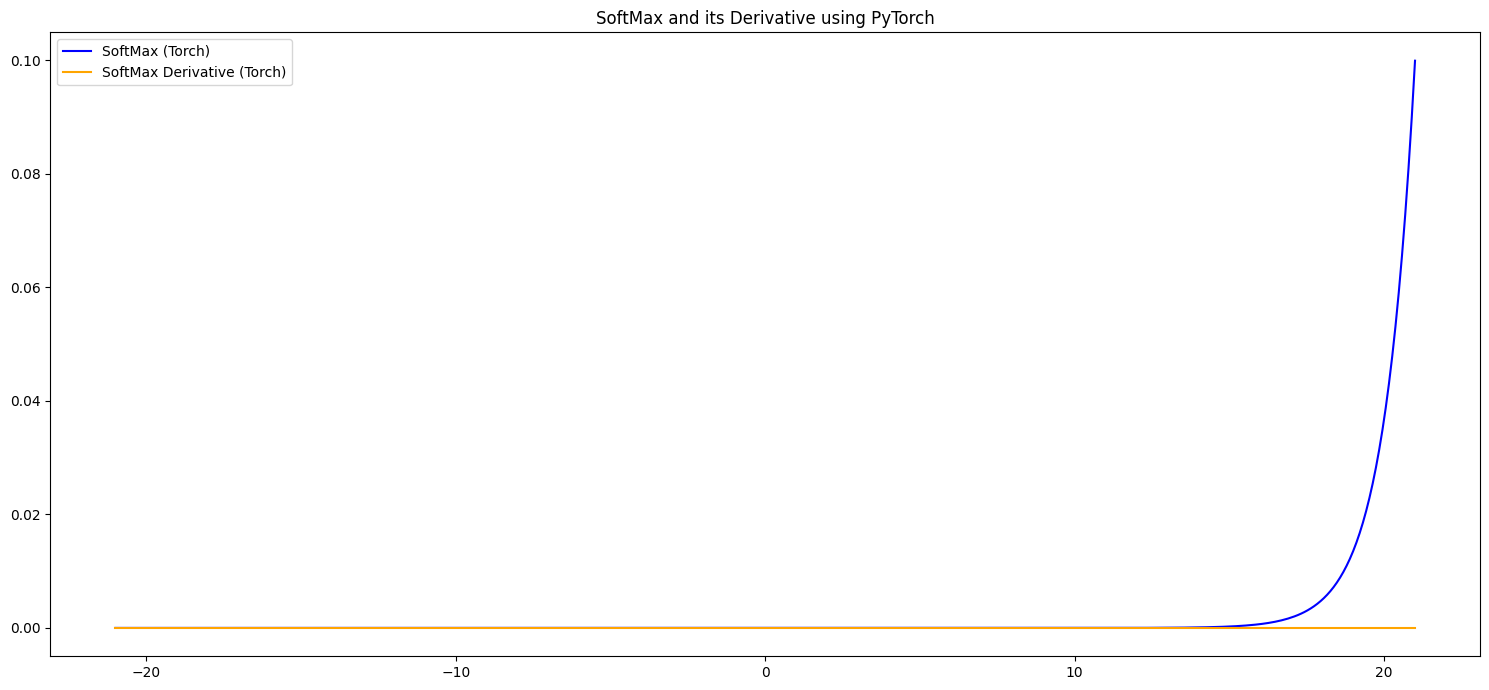

In [ ]:

def torch_softmax(z):
    z_tensor = torch.tensor(z, dtype=torch.float32, requires_grad=True)
    softmax_values = F.softmax(z_tensor, dim=0)
    return softmax_values.detach().numpy()

def torch_softmax_derivative(z, class_idx):
    z_tensor = torch.tensor([z], dtype=torch.float32, requires_grad=True)
    softmax_values = F.softmax(z_tensor, dim=0)
    gradient = z_tensor.grad.numpy()
    z_tensor.grad.zero_()
    return gradient

x_torch_n = torch.linspace(-21, 21, 400)

torch_softmax_values = torch_softmax(x_torch_n.numpy())
torch_softmax_derivative_values = [torch_softmax_derivative(xi.item(), np.argmax(torch_softmax(xi.item()))) for xi in x_torch_n]

plt.figure(figsize=(15, 7))

plt.plot(x_torch_n.numpy(), torch_softmax_values, label='SoftMax (Torch)', color='blue')
plt.plot(x_torch_n.numpy(), torch_softmax_derivative_values, label='SoftMax Derivative (Torch)', color='orange')
plt.title('SoftMax and its Derivative using PyTorch')
plt.legend()

plt.tight_layout()
plt.show()


# Task 2

## Task – 2: Implementing Perceptron using Pytorch
Different datasets can be generated using scikit-learn.
1. Use sklean.datasets and import make_blobs
2. Generate a dataset which consists of 100 patterns, 2 classes, standard
deviation =1 and 2 features.
3. Plot this dataset with a different color for each class using matplotlib.
4. Split the dataset into 70% for training and 30% for testing
5. Normalize the dataset to zero mean and unit variance. A good method is
described in https://machinelearningmastery.com/how-to-improve-neuralnetwork-stability-and-modeling-performance-with-data-scaling/
6. Plot the training and the testing datasets



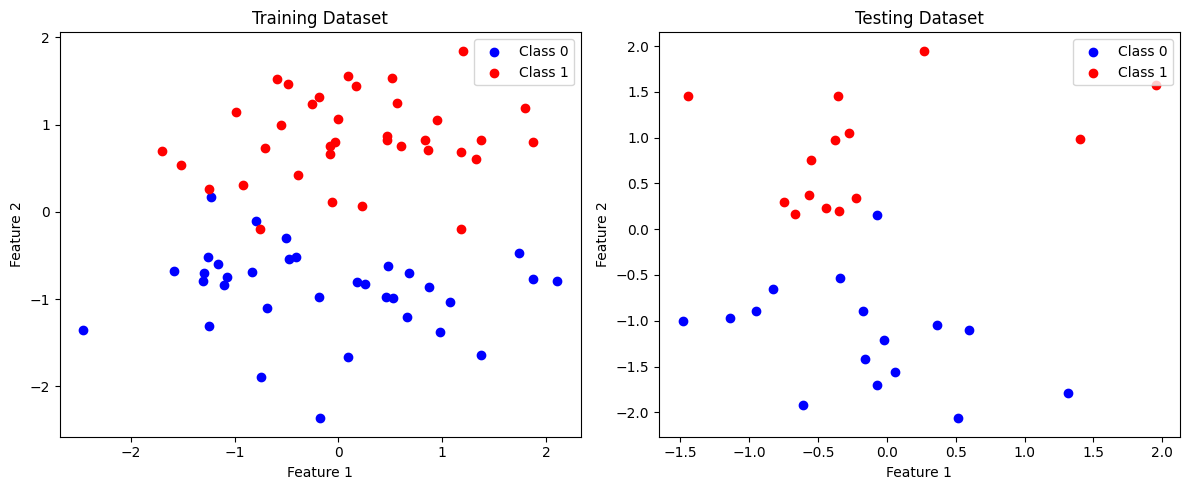

In [ ]:

X, y = make_blobs(n_samples=100, centers=2, random_state=4, cluster_std=1, n_features=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
plt.title('Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='Class 1')
plt.title('Testing Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


7. Define a perceptron class that includes different operations necessary for
achieving the classification operations such as training, forward, backwards,
and evaluation of the perceptron. (see picture below)
8. Train the perceptron using the class defined in 7.
9. Evaluate the model using the class in 7.
10. Draw the boundary line and plot the data.

#### Torch implemntation

Epoch [20/200], MSE: 0.2314
Epoch [40/200], MSE: 0.2147
Epoch [60/200], MSE: 0.1998
Epoch [80/200], MSE: 0.1866
Epoch [100/200], MSE: 0.1747
Epoch [120/200], MSE: 0.1641
Epoch [140/200], MSE: 0.1547
Epoch [160/200], MSE: 0.1462
Epoch [180/200], MSE: 0.1386
Epoch [200/200], MSE: 0.1317
Training Accuracy: 0.97
Testing Accuracy: 0.97


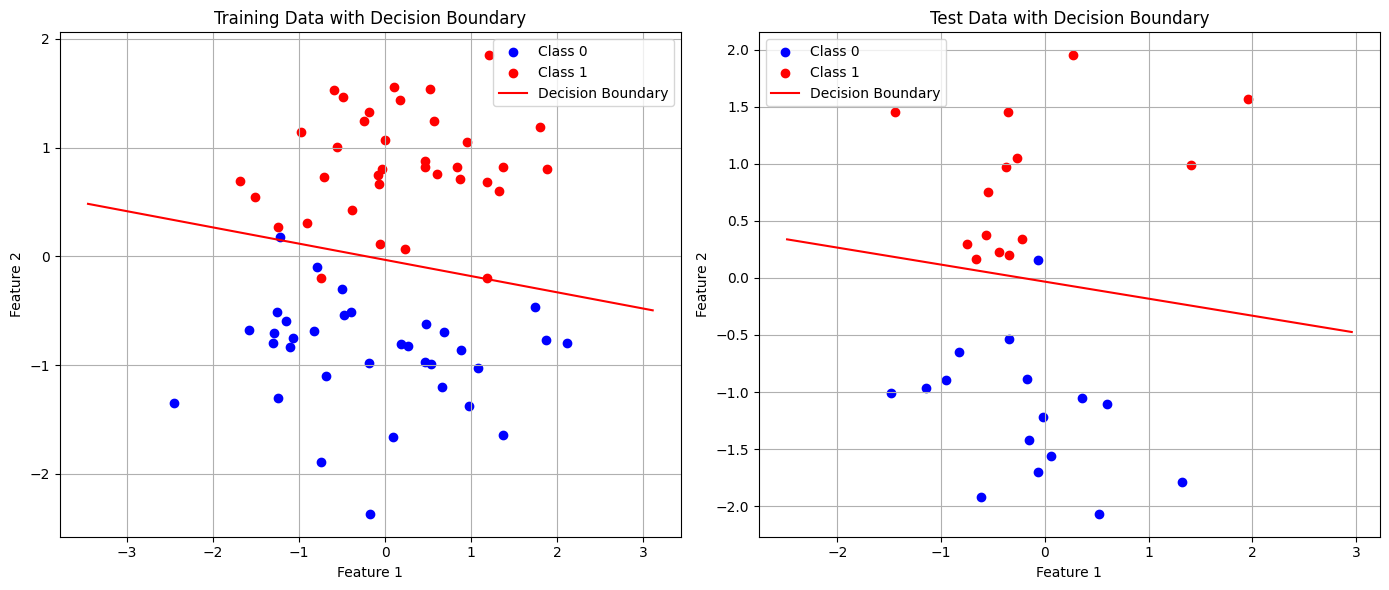

In [ ]:
class Perceptron:
    def __init__(self, input_dim):
        self.weights = torch.randn(input_dim, 1) * 0.01
        self.bias = torch.zeros(1, 1)

    def forward(self, x):
        linear_output = torch.matmul(x, self.weights) + self.bias
        predictions = torch.sigmoid(linear_output)
        return predictions

    def backward(self, x, outputs, y):
        errors = y - outputs
        dW = torch.matmul(x.T, errors) / x.size(0)
        dB = torch.sum(errors) / x.size(0)
        return dW, dB, errors

    def train(self, x, y, epochs=100, learning_rate=0.01):
        for epoch in range(epochs):
            outputs = self.forward(x)
            dW, dB, errors = self.backward(x, outputs, y)
            with torch.no_grad():
                self.weights += learning_rate * dW
                self.bias += learning_rate * dB

            mse = torch.mean(errors**2).item()

            if (epoch+1) % 20 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], MSE: {mse:.4f}")

    def evaluate(self, x, y):
        with torch.no_grad():
            outputs = self.forward(x)
            predicted = (outputs > 0.5).float()
            accuracy = (predicted == y).float().mean().item()
            return accuracy


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train[:, None], dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test[:, None], dtype=torch.float32)

model = Perceptron(input_dim=2)

model.train(X_train_tensor, y_train_tensor, epochs=200)

train_accuracy = model.evaluate(X_train_tensor, y_train_tensor)
test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)

train_accuracy, test_accuracy


train_accuracy = model.evaluate(X_train_tensor, y_train_tensor)
test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1')
y_values_train = (-model.weights[0] / model.weights[1] * x_values_train - model.bias / model.weights[1]).squeeze().numpy()
y_values_test = (-model.weights[0] / model.weights[1] * x_values_test - model.bias / model.weights[1]).squeeze().numpy()
plt.plot(x_values_train, y_values_train, '-r', label="Decision Boundary")
plt.title("Training Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='red', label='Class 1')
y_values_train = (-model.weights[0] / model.weights[1] * x_values_train - model.bias / model.weights[1]).squeeze().numpy()
y_values_test = (-model.weights[0] / model.weights[1] * x_values_test - model.bias / model.weights[1]).squeeze().numpy()
plt.plot(x_values_test, y_values_test, '-r', label="Decision Boundary")
plt.title("Test Data with Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


After completion of the task, you must be able to answer the following questions:
* Address and discuss the various complications (if any) that you have encountered in the preparation. What was the easy part?

* How many of the examples are correctly classified?

Easy Part:

Data Generation and Visualization: Using make_blobs from sklearn.datasets made it straightforward to generate a synthetic dataset and visualize it.
Model Definition: The perceptron model itself is simple, consisting of just a weighted sum of inputs followed by an activation function. Implementing it, either in PyTorch or using numpy, is quite straightforward.

How many of the examples are correctly classified?
Training Accuracy: 0.97
Testing Accuracy: 0.97




# Task 3

Task – 3: Working with Mnist dataset
Mnist dataset ( http://yann.lecun.com/exdb/mnist/ ) is a database of handwritten
digits that comprise a training set of 60,000 examples, and a test set of 10,000
examples. It is a subset of a larger set available from NIST. The digits have been sizenormalized and centred in a fixed-size image.
The original black and white (bi-level) images from NIST were size normalized to fit in
a 20x20 pixel box while preserving their aspect ratio. The resulting images contain
grey levels as a result of the anti-aliasing technique used by the normalization
algorithm. The images were centred in a 28x28 image by computing the centre of
mass of the pixels and translating the image to position this point at the centre of
the 28x28 field.
Your task:
1. Import torch and torchvision
2. Create a data loader to load the MNIST training dataset using torch.utils.data.
DataLoader()
3. Create a data loader to load the MNIST test dataset using torch.utils.data.
DataLoader()
4. Plot samples of the training images
5. Use the given classes to create a NN

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

len(train_dataset), len(test_dataset)


(60000, 10000)

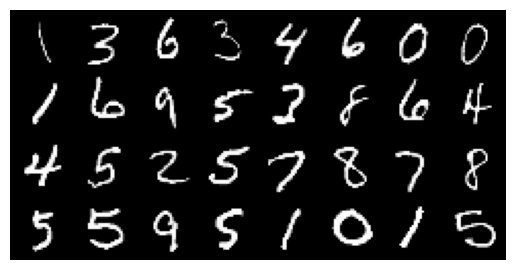

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')


dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [ ]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 10)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)






6. Use torch.optim to define the SGD optimizer
7. Train the network using the following data and the train function
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
8. Test the network using the test function
9. Evaluate the network by calculating the loss function and plot it

In [ ]:

model = Net()
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

train_losses = []
test_losses = []
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        output = model(data)

        loss = F.nll_loss(output, target)

        loss.backward()

        optimizer.step()

        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx*len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")
            train_losses.append(loss.item())

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target,size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    #print(test_loss)
    test_losses.append(test_loss)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n")

test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()




Test set: Average loss: 2.3124, Accuracy: 865/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.329852
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.266450
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.222865
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.179314
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.139376
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.069508
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.962520
Train Epoch: 1 [2240/60000 (4%)]	Loss: 1.871688
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.848051
Train Epoch: 1 [2880/60000 (5%)]	Loss: 1.754065
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.422876
Train Epoch: 1 [3520/60000 (6%)]	Loss: 1.423046
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.326489
Train Epoch: 1 [4160/60000 (7%)]	Loss: 1.206219
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.044982
Train Epoch: 1 [4800/60000 (8%)]	Loss: 1.007635
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.925624
Train Epoch: 1 [5440/60000 (9%)]	Loss: 0.792269
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.866516
Train Epoch: 1 [6080/60000 (10%)]	

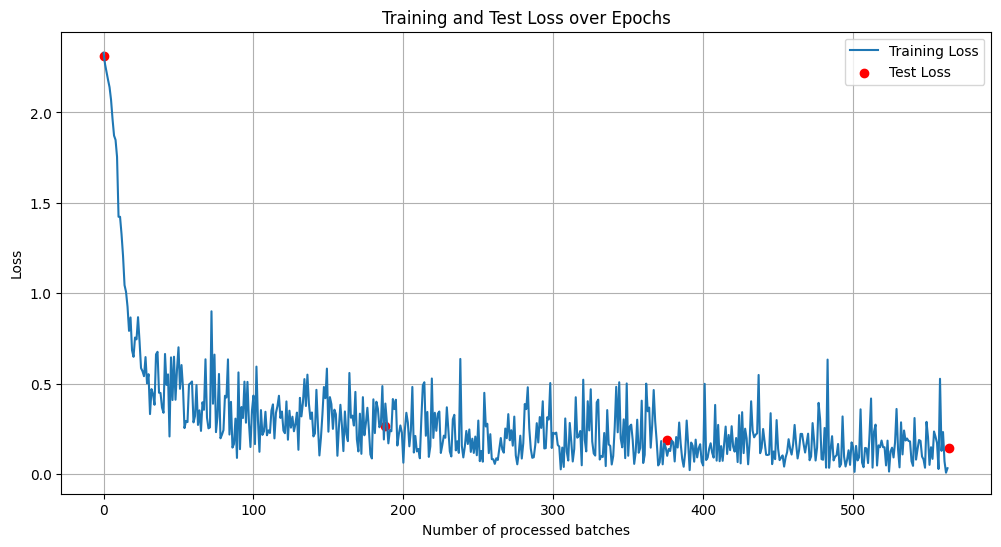

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Training Loss", linestyle='-')
plt.scatter([(x)*len(train_losses)/n_epochs for x in range(len(test_losses))], test_losses, color='red', label="Test Loss", marker='o')
plt.legend()
plt.xlabel("Number of processed batches")
plt.ylabel("Loss")
plt.title("Training and Test Loss over Epochs")
plt.grid(True)
plt.show()

After completion of the task, you must be able to answer the following questions:
* Address and discuss the various complications (if any) that you have encountered
in the preparation. What was the easy part?
* How many of the examples are correctly classified?
* Do you get different classification results by tuning the parameters? Discuss the
influence of parameters on the classification rate.

* Address and discuss the various complications (if any) that you have encountered in the preparation. What was the easy part?
 * Easy part was loading the data and plotting was the diffcult a bit difficult
* How many of the examples are correctly classified?
around 95%
* Do you get different classification results by tuning the parameters? Discuss the influence of parameters on the classification rate.
 * Learning Rate: One of the most influential hyperparameters. If it's too high, the model might overshoot the optimal weights during training and never converge. If it's too low, the model might take an exceedingly long time to converge, or it might get stuck in a local minimum.
 * Momentum: Helps accelerate gradient descent in the relevant direction and dampens oscillations. A higher momentum can lead to faster convergence but might overshoot. Too low momentum might make the training process slow and more susceptible to oscillations.
 * Batch Size: A smaller batch size can lead to a more accurate model as the model updates weights more frequently, but it can be noisier and take longer. A larger batch size can make the training faster, but the gradients might be less accurate.
 * Number of Epochs: Training for more epochs might result in a better trained model but also risks overfitting if trained for too long without proper regularization.
 * Network Architecture: The number of layers, number of neurons in each layer, and type of activation functions can significantly influence the performance. A deeper network might capture more complex patterns but risks overfitting and requires more data.

By tuning these parameters and experimenting with different combinations, one can achieve varying classification results.

In [ ]:
|